In [1]:
from sklearn.feature_extraction.text import CountVectorizer

#### start with the minimal data set, two records, each representing a different keyword

In [2]:
# https://clinicaltrials.ucsf.edu/trial/NCT03325426
blood_pressure_trial = "The study aims to determine if use of physical activity trackers \
coupled with provider feedback will increase awareness of young adults of their physical \
fitness and improve blood pressure levels."

In [3]:
# https://clinicaltrials.ucsf.edu/trial/NCT03524716
cancer_trial = "There is a critical need for physical activity interventions in CRC. The investigators \
have developed a digital health physical activity intervention, Smart Pace, which includes a wearable \
tracker (Fitbit) and text messaging and aims to have patients build up to 150 min/wk of moderate activity"

In [4]:
all_trials = [blood_pressure_trial, cancer_trial]

#### get the most common words across all clinical trials

In [5]:
vectorizer = CountVectorizer(analyzer = "word")
bag_of_words = vectorizer.fit(all_trials)

In [6]:
print(vectorizer.get_feature_names())

['150', 'activity', 'adults', 'aims', 'and', 'awareness', 'blood', 'build', 'coupled', 'crc', 'critical', 'determine', 'developed', 'digital', 'feedback', 'fitbit', 'fitness', 'for', 'have', 'health', 'if', 'improve', 'in', 'includes', 'increase', 'intervention', 'interventions', 'investigators', 'is', 'levels', 'messaging', 'min', 'moderate', 'need', 'of', 'pace', 'patients', 'physical', 'pressure', 'provider', 'smart', 'study', 'text', 'the', 'their', 'there', 'to', 'tracker', 'trackers', 'up', 'use', 'wearable', 'which', 'will', 'with', 'wk', 'young']


#### try this without the common stop words, and set a maximum number of words

In [7]:
vectorizer = CountVectorizer(analyzer = "word", stop_words = 'english', max_features = 30)
bag_of_words = vectorizer.fit(all_trials)
print(vectorizer.get_feature_names())

['150', 'activity', 'adults', 'aims', 'awareness', 'blood', 'build', 'coupled', 'crc', 'critical', 'intervention', 'investigators', 'levels', 'messaging', 'min', 'moderate', 'need', 'pace', 'patients', 'physical', 'pressure', 'provider', 'smart', 'study', 'text', 'tracker', 'trackers', 'use', 'wearable', 'wk']


#### create a word vector, a count of how many times each word shows up in a particular record

In [8]:
cancer_trial_vector = vectorizer.transform([cancer_trial])

In [9]:
ct = cancer_trial_vector.toarray()
ct

array([[1, 3, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0,
        1, 0, 1, 1, 0, 0, 1, 1]])

In [10]:
blood_pressure_vector = vectorizer.transform([blood_pressure_trial])

In [11]:
bp = blood_pressure_vector.toarray()
bp

array([[0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1,
        0, 1, 0, 0, 1, 1, 0, 0]])

In [12]:
### what about combinations of words? you might try using ngrams 
vectorizer = CountVectorizer(analyzer = "word", stop_words = 'english', 
                             ngram_range=(2, 2), max_features = 100)
bag_of_words = vectorizer.fit(all_trials)
print(vectorizer.get_feature_names())

['150 min', 'activity intervention', 'activity interventions', 'activity trackers', 'adults physical', 'aims determine', 'aims patients', 'awareness young', 'blood pressure', 'build 150', 'coupled provider', 'crc investigators', 'critical need', 'determine use', 'developed digital', 'digital health', 'feedback increase', 'fitbit text', 'fitness improve', 'health physical', 'improve blood', 'includes wearable', 'increase awareness', 'intervention smart', 'interventions crc', 'investigators developed', 'messaging aims', 'min wk', 'moderate activity', 'need physical', 'pace includes', 'patients build', 'physical activity', 'physical fitness', 'pressure levels', 'provider feedback', 'smart pace', 'study aims', 'text messaging', 'tracker fitbit', 'trackers coupled', 'use physical', 'wearable tracker', 'wk moderate', 'young adults']


### visualization and pandas

It can be useful to look at these side by side, using pandas and a bar chart

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
vectorizer = CountVectorizer(analyzer = "word", stop_words = 'english', max_features = 30)
bag_of_words = vectorizer.fit(all_trials)
print(vectorizer.get_feature_names())

['150', 'activity', 'adults', 'aims', 'awareness', 'blood', 'build', 'coupled', 'crc', 'critical', 'intervention', 'investigators', 'levels', 'messaging', 'min', 'moderate', 'need', 'pace', 'patients', 'physical', 'pressure', 'provider', 'smart', 'study', 'text', 'tracker', 'trackers', 'use', 'wearable', 'wk']


In [15]:
df = pd.DataFrame({"word": vectorizer.get_feature_names(), "blood_pressure": bp[0], "cancer_trial": ct[0]})
df = df.set_index('word')
df

,blood_pressure,cancer_trial
word,,
150,0,1
activity,1,3
adults,1,0
aims,1,1
awareness,1,0
blood,1,0
build,0,1
coupled,1,0
crc,0,1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

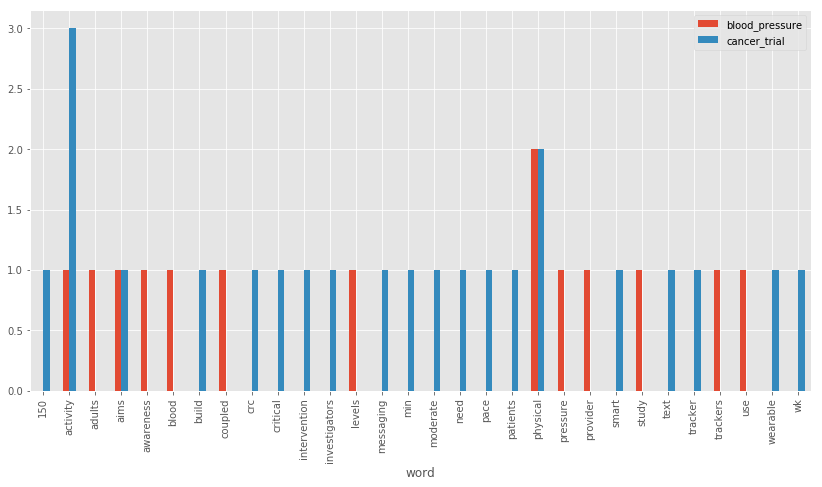

In [16]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [14,7]
df.plot(kind='bar')
plt.xticks(rotation=90)